In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

%matplotlib inline

In [47]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
file_path = 'data/cars.csv'
#urllib.request.urlretrieve(url, file_path)

In [48]:
df = pd.read_csv(file_path)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [49]:
df.shape

(11914, 16)

In [50]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [51]:
strings = df.columns[df.dtypes == 'object']

In [52]:
strings

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [53]:
df[strings] = df[strings].apply(lambda col: col.str.lower().str.replace(' ', '_'))


In [54]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploratory data analysis

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

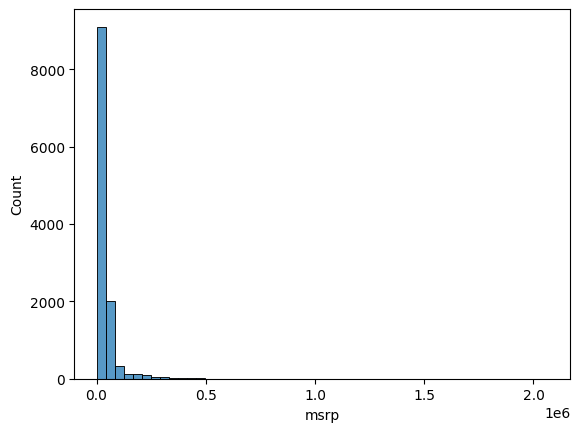

In [12]:
sns.histplot(df.msrp, bins=50)
plt.show()

<Axes: xlabel='msrp', ylabel='Count'>

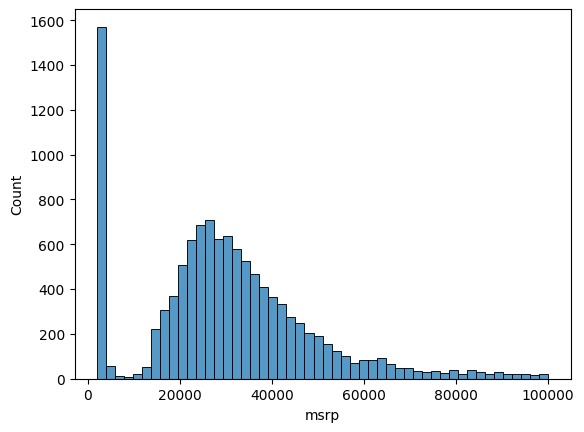

In [29]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

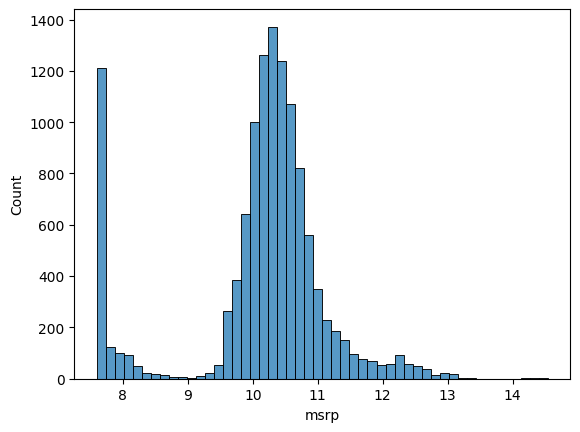

In [30]:
msrp_logs = np.log1p(df.msrp)
sns.histplot(msrp_logs, bins=50)

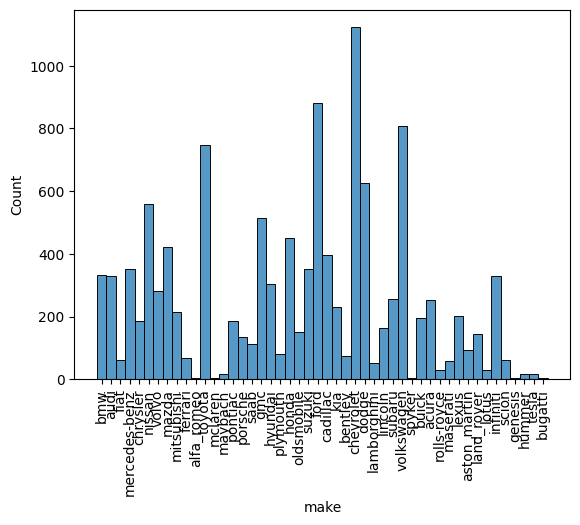

In [36]:
sns.histplot(df.make, bins=50)
plt.xticks(rotation=90)
plt.show()

In [33]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### 2.4 Validation framework

In [80]:
# Using 60% of the data for training and 20% for validation and 20% for testing

n = df.shape[0]

idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [81]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [82]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [83]:
df_train = df.iloc[idx[:n_train]] 
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [84]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [85]:
y_train = np.log1p(df_train.msrp.values)
df_train = df_train.drop(['msrp'], axis=1)
y_val = np.log1p(df_val.msrp.values)
df_val = df_val.drop(['msrp'], axis=1)
y_test = np.log1p(df_test.msrp.values)
df_test = df_test.drop(['msrp'], axis=1)

In [86]:
df_train.sample(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
6170,volkswagen,jetta,2015,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,4.0,"factory_tuner,performance",midsize,sedan,33,23,873
4707,toyota,paseo,1997,regular_unleaded,93.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,34,26,2031
4167,toyota,tacoma,2015,regular_unleaded,236.0,6.0,manual,four_wheel_drive,4.0,NaN,compact,crew_cab_pickup,19,15,2031


In [87]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

### 2.5 Linear Regression

In [88]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [89]:
def dot(X: np.ndarray, W: np.ndarray)->float:
    n = len(X)
    result = []
    for i in range(n):
        res = 0.0
        for j in range(X.shape[1]):
            res += X[i][j] * W[j]
        result.append(res)
    return np.array(result)

In [90]:
def linear_regression(X, W, b):
    return dot(X, W) + b

In [91]:
b = 7.17
W = [0.01, 0.04, 0.002]

In [92]:
W = np.array(W)
W

array([0.01 , 0.04 , 0.002])

In [93]:
x1 = [148, 24, 1385]
x2 = [132, 25, 2031]
x3 = [453, 11, 86]

X = np.array([x1, x2, x3])

In [94]:
linear_regression(X, W, b)

array([12.38 , 13.552, 12.312])

### Training Linear Regression

In [95]:
# To find the weights, we will use the gram matrix and multiply by it's inverse
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 15, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 89]
]

X = np.array(X)

In [96]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [97]:
def train_linear_regression(X_train, y_train):
    ones = np.ones(X_train.shape[0])
    X = np.column_stack([X_train, ones])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    W_b = XTX_inv.dot(X.T).dot(y_train)
    W, b = W_b[:X_train.shape[1]], W_b[-1]
    return W, b

In [98]:
train_linear_regression(X, y)

(array([ -14.59528022, -184.60236103,   -1.16443547]), 25164.088001183933)

### Car price baseleine model

In [99]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [100]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

In [101]:
X_train.shape

(7150, 5)

In [102]:
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [103]:
W, b = train_linear_regression(X_train, y_train)

In [104]:
W

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

In [105]:
b

7.927257388070123

In [106]:
y_pred = linear_regression(X_train, W, b)

<Axes: ylabel='Count'>

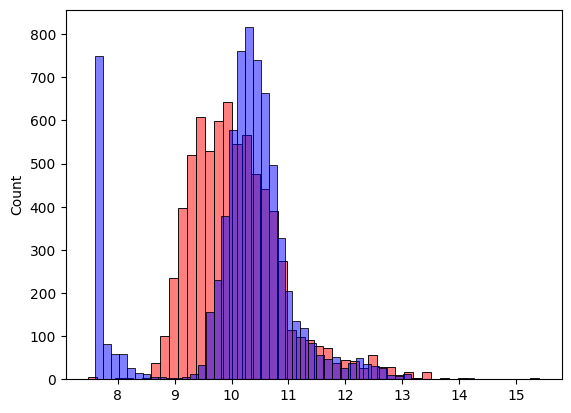

In [107]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

#### **RMSE**

In [108]:
def rmse(y_pred, y):
    m = len(y)
    mse = 0.0

    for i in range(m):
        mse += (y_pred[i] - y[i])**2
    
    rmse = np.sqrt(1/m * mse)
    return rmse


In [109]:
def prepare_data(df: pd.DataFrame)->np.ndarray:
    df_num = df[base].fillna(0).values
    X = df_num

    return X

In [110]:
X_train = prepare_data(df_train)
y_pred = linear_regression(X_train, W, b)

rmse(y_train, y_pred)

0.7554192603920128

### Validating the model

In [111]:
X_val = prepare_data(df_val)
y_pred_val = linear_regression(X_val, W, b)

rmse(y_pred_val, y_val)

0.7616530991301624

### Simple feature engineering

In [112]:
# We are going to add the year as part of the features as it is a key feature for determining car prices
df.year.max()

2017

In [113]:
2017 - df.year

0         6
1         6
2         6
3         6
4         6
         ..
11909     5
11910     5
11911     5
11912     4
11913    11
Name: year, Length: 11914, dtype: int64

In [114]:
def prepare_data(df: pd.DataFrame)->np.ndarray:
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0).values
    X = df_num

    return X

In [115]:
X_train = prepare_data(df_train)
W, b = train_linear_regression(X_train, y_train)

X_val = prepare_data(df_val)
y_pred_val = linear_regression(X_val, W, b)

rmse(y_pred_val, y_val)

0.517205546105838

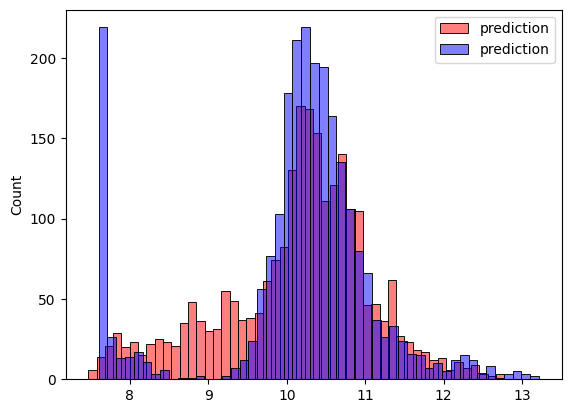

In [116]:
sns.histplot(y_pred_val, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', label='prediction', alpha=0.5, bins=50)
plt.legend()
plt.show()

### Categorical variables

In [122]:
makes = list(df.make.value_counts().head().index)


chevrolet
ford
volkswagen
toyota
dodge


In [143]:
categorical_columns = list(df_train.select_dtypes(include=['O']).columns)

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [145]:
def prepare_data(df):
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df[f'num_doors_{v}'] = (df['number_of_doors'] == v).astype(int)
        features.append(f'num_doors_{v}')

    for name, values in categorical.items():    
        for value in values:
            df[f'{name}_{value}'] = (df[name] == value).astype(int)
            features.append(f'{name}_{value}')

    df_num = df[features].fillna(0)
    X = df_num.values

    return X

In [150]:
X_train = prepare_data(df_train)
W, b = train_linear_regression(X_train, y_train)

X_val = prepare_data(df_val)
y_pred = linear_regression(X_val, W, b)
rmse(y_val, y_pred)

34.67613250345167

In [152]:
W

array([-1.43056170e-01,  2.97242562e+00,  3.70715494e-01, -3.69687013e-01,
        1.12482166e-03,  4.93700692e-01,  1.92978369e+03,  1.93096399e+03,
        1.92715375e+03,  8.47539402e-01, -4.71066737e+00,  9.09414659e+00,
        9.10910132e-01, -5.81476778e+00, -1.54005325e+01,  1.67336936e+00,
       -2.48594917e+01, -6.14774918e+00,  7.48905137e+00, -1.69816857e+02,
       -1.57059661e+02, -1.72579650e+02, -1.70041055e+02, -1.70466186e+02,
       -1.03392114e+16, -1.03392114e+16, -1.03392114e+16, -1.03392114e+16,
       -1.03392114e+16,  1.03392114e+16,  1.03392114e+16,  1.03392114e+16,
        1.03392114e+16,  8.34961591e+00,  4.58566215e+00, -4.98851285e+00,
       -1.63212931e+00, -1.30723621e+00, -1.39066838e+01,  7.92419611e+00,
        1.64289629e+01, -9.63971162e-02, -1.65377271e-02,  1.65381720e-01,
        3.31158372e-01, -2.13380372e-01])